In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# orient='records' parameter informs each line in the file represents a JSON record
df_portfolio = pd.read_json(r"C:\Users\user\Downloads\archive (1)\portfolio.json",orient="records", lines=True)
df_customer = pd.read_json(r"C:\Users\user\Downloads\archive (1)\profile.json", orient="records", lines=True)
df_transcript = pd.read_json(r"C:\Users\user\Downloads\archive (1)\transcript.json", orient="records", lines=True)

In [3]:
print(df_portfolio.shape)
print(df_customer.shape)
print(df_transcript.shape)

(10, 6)
(17000, 5)
(306534, 4)


In [4]:
df_portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
df_customer.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
df_transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [7]:
df_portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [8]:
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [9]:
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [10]:
#針對customer null值欄位細看
missing_gender = df_customer[df_customer['gender'].isna()]
missing_income = df_customer[df_customer['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])
#比對上述的null值數量一致，表示此份資料有2157筆同時沒有性別和收入，雖然收入對我們想研究的問題很重要，但因扣除2175筆，
#我們仍有14000多筆資料可以分析，故影響因不大，下一步將會將這些空值列移除

2175

In [11]:
id_to_remove = missing_income['id']
df_customer_no_na = df_customer[~df_customer['id'].isin(id_to_remove)]
df_customer_no_na = df_customer_no_na.reset_index(drop = True)
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


<h2> 各自檢查其Dtype

In [12]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [13]:
#針對 channels,offer_typ,id 三個object型態的欄位細看
channels_0 = df_portfolio['channels'][0]
offer_type_0 = df_portfolio['offer_type'][0]
id_0 = df_portfolio['id'][0]

print('First value in column channels:', channels_0, '  --   Data type:', type(channels_0))
print('First value in column offer_type:', offer_type_0, '  --   Data type:', type(offer_type_0))
print('First value in column id:', id_0, '  --   Data type:', type(id_0))
#發現 portfolio 的channel 是發放管道的list組合，優惠券內容是字串，優惠券id也是字串

First value in column channels: ['email', 'mobile', 'social']   --   Data type: <class 'list'>
First value in column offer_type: bogo   --   Data type: <class 'str'>
First value in column id: ae264e3637204a6fb9bb56bc8210ddfd   --   Data type: <class 'str'>


In [14]:
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [15]:
df_customer_no_na['became_member_on'] = pd.to_datetime(df_customer_no_na['became_member_on'], format = '%Y%m%d')
df_customer_no_na.head()

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [16]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [17]:
#time欄位改名方便檢視
df_transcript.rename(columns = {'time' : 'hours_since_start'}, inplace = True)
df_transcript.head(1)

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


In [18]:
type(df_transcript['value'][0])

dict

<h2>Data transformation

In [19]:
#依照不同種優會券類型和低消重新排序並給予offer代碼方便往後檢視
df_portfolio = df_portfolio.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

from string import ascii_uppercase
df_portfolio['offer_alias'] = [ascii_uppercase[i] for i in range(df_portfolio.shape[0])]
df_portfolio

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


In [22]:
# 把value的key跟值拆開
value_column = df_transcript['value']
dictionary_key_column = [list(d.keys())[0] for d in value_column]
dictionary_value_column = [list(d.values())[0] for d in value_column]
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [23]:
# 移除原本value欄位
df_transcript_value_dic = df_transcript.drop('value', axis = 1)
df_transcript_value_dic = pd.concat([df_transcript_value_dic, value_column_split], axis = 1)

In [24]:
df_transcript_value_dic.columns.values

array(['person', 'event', 'hours_since_start', 'dict_key', 'dict_value'],
      dtype=object)

In [25]:
#把跟offer有關的欄位(dict_key,dict_value往前移
col_names = ['person', 'event', 'dict_key', 'dict_value', 'hours_since_start']
df_transcript_value_dic = df_transcript_value_dic[col_names]
df_transcript_value_dic.sample(3)

,person,event,dict_key,dict_value,hours_since_start
160667,7737b85f7f5e4b2c8b7d9003015c73d4,offer received,offer id,fafdcd668e3743c1bb461111dcafc2a4,408
51012,fb16abdfaa1d421d9e11f1ac5c8e80df,transaction,amount,0.43,150
93907,cce987c57eba4b32a095ac462d709db4,transaction,amount,21.43,246


In [26]:
portfolio = df_portfolio.copy()
customers = df_customer_no_na.copy()
transcripts = df_transcript_value_dic.copy()

<H2>Data analysis

# 1. 優惠券怎麼發才能帶來效益?

In [27]:
transcripts['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

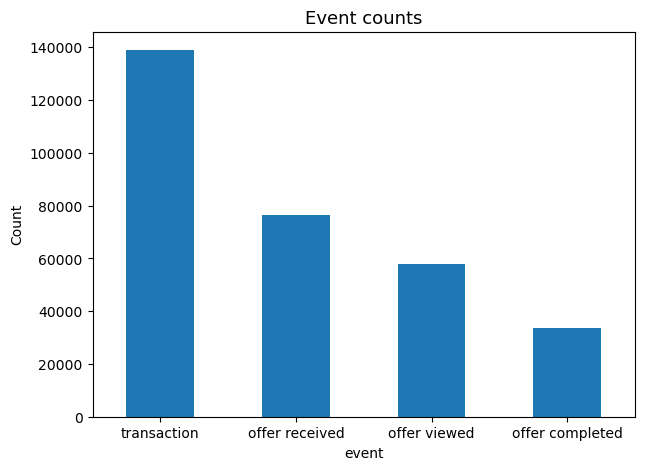

In [28]:
fig = plt.figure(figsize = (7,5))
transcripts['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Event counts', fontsize = 13)
plt.show()

<b>Finding<b>
<li>transaction是completed的四倍左右
<li>大約有33,600 offer completions, offers viewed 佔 58% ,offers received佔 44%
<p>-> 可推估星巴克會員的黏著度還算高

In [29]:
# 把交易時間新增用day表示的方式
transcripts = transcripts.assign(days_since_start = transcripts['hours_since_start']/24).astype({'days_since_start': 'int64'})
print('The minimum and the maximum of column days_since_start: {} and {}'.format(transcripts['days_since_start'].min(), transcripts['days_since_start'].max()))

The minimum and the maximum of column days_since_start: 0 and 29


<p>資料集的campain活動約一個月

In [30]:
transcripts.head()

,person,event,dict_key,dict_value,hours_since_start,days_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,2906b810c7d4411798c6938adc9daaa5,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,offer id,fafdcd668e3743c1bb461111dcafc2a4,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


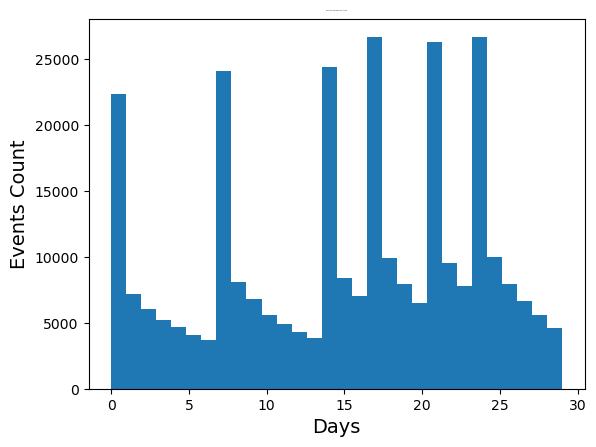

In [31]:
plt.hist(transcripts['days_since_start'], bins = 30)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Events Count', fontsize = 14)
plt.title('Events Occurrence over time', fontsize = 1)
plt.show()

<p>由圖表可以發現有6個高峰，推估應為發放優惠券的日期，其他瀏覽、兌換集完成交易的活動隨之在後

In [32]:
transcripts[transcripts['event'] == 'offer received'].groupby('hours_since_start').count()

,person,event,dict_key,dict_value,days_since_start
hours_since_start,,,,,
0,12650,12650,12650,12650,12650
168,12669,12669,12669,12669,12669
336,12711,12711,12711,12711,12711
408,12778,12778,12778,12778,12778
504,12704,12704,12704,12704,12704
576,12765,12765,12765,12765,12765


<p>用groupby方式證實確實有六個高峰點收到優惠券，接下來繼續分析其他event的發生的時間點

In [33]:
#看每一小時有多少event發生
viewed_hourly = transcripts[transcripts['event'] == 'offer viewed'].value_counts('hours_since_start').sort_index()
completed_hourly = transcripts[transcripts['event'] == 'offer completed'].value_counts('hours_since_start').sort_index()
transaction_hourly = transcripts[transcripts['event'] == 'transaction'].value_counts('hours_since_start').sort_index()
print(len(viewed_hourly), len(completed_hourly), len(transaction_hourly))

120 120 120


<p>都是120筆，表示三個event是能夠對照起來的，因為campain起始點發放時間都是第0小時

In [34]:
#二次驗證
(viewed_hourly.index.values == completed_hourly.index.values).sum(),
(completed_hourly.index.values == transaction_hourly.index.values).sum()

120

In [35]:
# 每一天分別有幾筆活動
received_hourly = transcripts[transcripts['event'] == 'offer received'].value_counts('hours_since_start').sort_index()
received_daily = transcripts[transcripts['event'] == 'offer received'].value_counts('days_since_start').sort_index()
viewed_daily = transcripts[transcripts['event'] == 'offer viewed'].value_counts('days_since_start').sort_index()
completed_daily = transcripts[transcripts['event'] == 'offer completed'].value_counts('days_since_start').sort_index()
transaction_daily = transcripts[transcripts['event'] == 'transaction'].value_counts('days_since_start').sort_index()

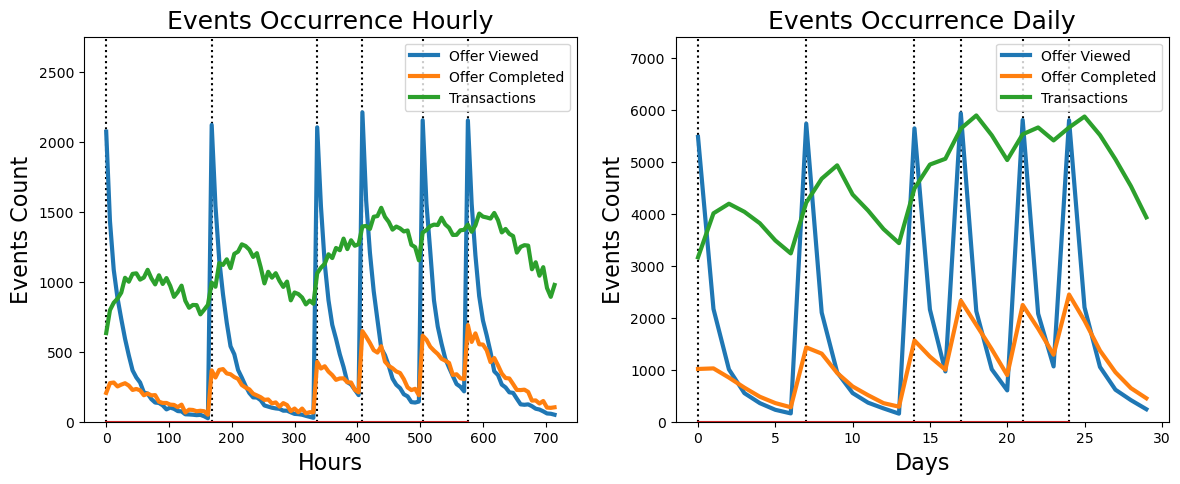

In [36]:
#用圖表把數字視覺化
hours = viewed_hourly.index.values
fig, axs = plt.subplots(1,2, figsize = (14, 5))
axs[0].stem(received_hourly.index.values, received_hourly, linefmt = ':k')
axs[0].plot(hours, viewed_hourly, lw = 3)
axs[0].plot(hours, completed_hourly, lw = 3)
axs[0].plot(hours, transaction_hourly, lw = 3)
axs[0].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[0].set_ylim([0, 2750])
axs[0].set_xlabel('Hours', fontsize = 16)
axs[0].set_ylabel('Events Count', fontsize = 16)
axs[0].set_title('Events Occurrence Hourly', fontsize = 18)

days = np.arange(30)
axs[1].stem(received_daily.index.values, received_daily, linefmt = ':k')
axs[1].plot(days, viewed_daily, lw = 3)
axs[1].plot(days, completed_daily, lw = 3)
axs[1].plot(days, transaction_daily, lw = 3)
axs[1].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[1].set_ylim([0, 7400])
axs[1].set_xlabel('Days', fontsize = 16)
axs[1].set_ylabel('Events Count', fontsize = 16)
axs[1].set_title('Events Occurrence Daily', fontsize = 18)

plt.show()

<b>Finding

<li>右手邊以「天」的折線圖可以發現Offer completion 高度相關於 offer viewing ，再用hours細看，則發現一樣相關但有非常短的延遲。表示大部分消費者傾向查看完優惠券後幾小時就做出兌換行為，也就是會在查看當天使用優惠券。
<li>Transactions一樣有和其他兩個event相關，但有一點分散，不過有個有趣的發現是大概在每一次的viewed高峰時，offer completion會在幾小時內迅速達到高峰，transcation也會在約2天後達到高峰，這表示優惠券不僅帶來了顧客直接使用優惠的購買量（享受折扣或其他優惠），還有助於形成顧客的購買習慣（儘管個別優惠的持續時間較短）。

# Insight：

<p>優惠券不只可以直接帶來收益且可以增加黏著度，但優惠券活動的效益是短暫的，因此星巴克應該以一定的頻率向顧客發送優惠券，以幫助形成他們的購買習慣，若是發送頻率太低，加總所有顧客的成本後將會造成可觀的行銷浪費。

# 2. 用view rate 來看哪種優惠管道的推播效益比較好

In [37]:
#萃取和優惠券有關的列(offer_recieved,offer viewed,offer completed)
df_event = transcripts[~(transcripts['event'] == 'transaction')]

#把它跟portfolio資料表合併
event_offer = pd.merge(df_event, portfolio, left_on = 'dict_value', right_on = 'id').drop('id', axis = 1)

# 整理欄位順序
col_names = ['person', 'event', 'offer_alias', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'hours_since_start', 'days_since_start', 'dict_key', 'dict_value',]
event_offer = event_offer[col_names]

# 移除不重要欄位用offer_alias辦別offer即可
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer.sample(3)

,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,hours_since_start,days_since_start,dict_key
45739,c6a2cd4fdc104ea5896ac60300f6842d,offer received,F,2,"[web, email, mobile, social]",10,10,discount,0,0,offer id
93591,e70d2311d88c41b8abd04bb3e3039e91,offer received,B,5,"[web, email, mobile, social]",5,5,bogo,408,17,offer id
102617,b9d1a125fe14420181322874001f4fc9,offer completed,B,5,"[web, email, mobile, social]",5,5,bogo,606,25,offer_id


In [38]:
#計算完成率
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)

offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

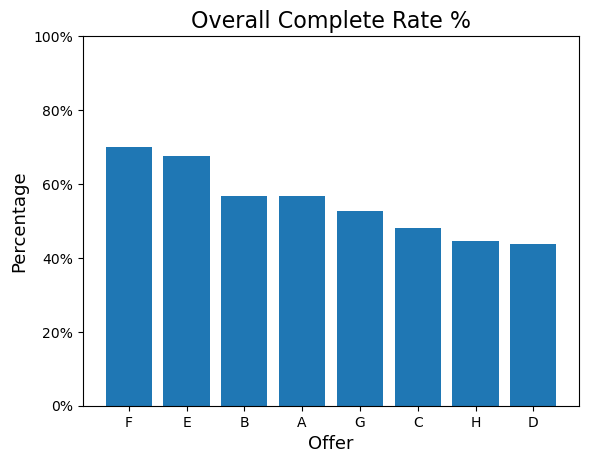

In [39]:
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)

plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 16)
plt.xlabel('Offer', fontsize = 13)
plt.ylabel('Percentage', fontsize = 13)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%','20%', '40%', '60%', '80%', '100%'])
plt.show()

<p>優惠券I,J型態是Information，所以沒有完成率可言

In [40]:
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)
print(p0)

offer_alias
A    7677
H    7668
C    7658
E    7646
G    7632
J    7618
I    7617
F    7597
D    7593
B    7571
Name: count, dtype: int64


<p>在資料集的行銷活動中，每種優惠券大約都是7600次發送。前面的分析有題到行銷活動一輪約6天進行一個月，在分析 view rate以前，先檢查所有客戶是否按一定順序收到優惠券，因會收到的順序可能會影響回應與否，這會導致 view rate和completion rate的偏差。

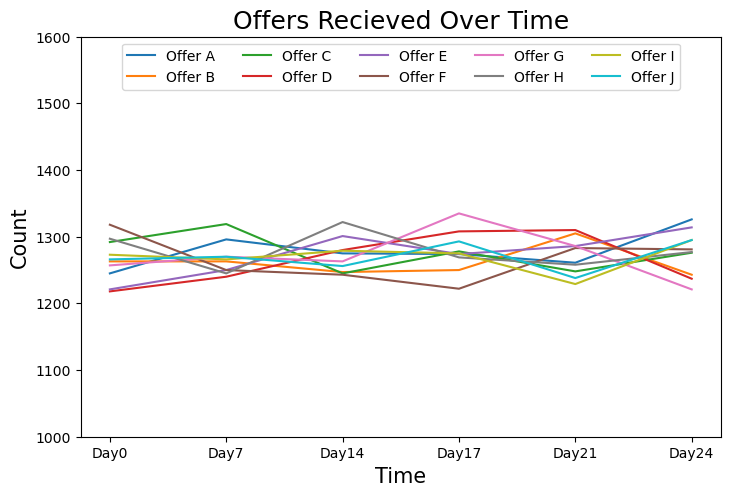

In [41]:
num_offers = portfolio.shape[0]
each_offer_received = pd.DataFrame(index = received_daily.index.values)
for col in ascii_uppercase[:num_offers]:
    each_offer_received[col] = offer_received[offer_received['offer_alias'] == col].value_counts('days_since_start').sort_index()
each_offer_received.index = ['Day' + str(x) for x in received_daily.index.values]

fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))
for col in ascii_uppercase[:num_offers]:
    ax.plot(np.arange(6), each_offer_received[col])
    
ax.set_ylim([1000,1600])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(each_offer_received.index.values)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
legend_str = ['Offer ' + i for i in ascii_uppercase[:num_offers]]
plt.legend(legend_str, loc = 'upper center', ncol = 5, fontsize = 10)
plt.title('Offers Recieved Over Time', fontsize = 18)
plt.show()

<P>每種優惠券在第0,7,14,17,21,24 接收的數量都差不多，因此可以避免都偏差。

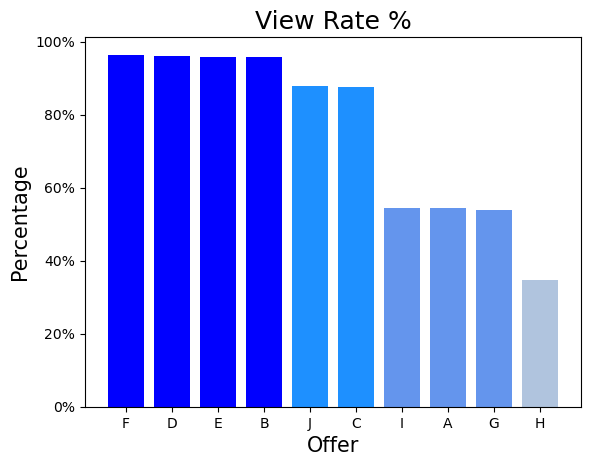

In [42]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p1 = offer_viewed.value_counts('offer_alias').sort_values(ascending = False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(p1)), height = p1_rate.values, tick_label = p1_rate.index.values,
       color = ['blue', 'blue','blue', 'blue', 'dodgerblue', 'dodgerblue','cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'lightsteelblue'])
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

In [43]:
p1_rate

offer_alias
F    0.964460
D    0.961148
E    0.959587
B    0.959451
J    0.877789
C    0.876991
I    0.544046
A    0.543311
G    0.539570
H    0.347287
Name: count, dtype: float64

In [44]:
portfolio['group'] = 'NA'
order = ['Group1', 'Group2','Gruop3','Group4']
portfolio.loc[portfolio['offer_alias'].isin(['F', 'D','E','B']), 'group'] = order[0]
portfolio.loc[portfolio['offer_alias'].isin(['J', 'C']), 'group'] = order[1]
portfolio.loc[portfolio['offer_alias'].isin(['I', 'A','G']), 'group'] = order[2]
portfolio.loc[portfolio['offer_alias'].isin(['H']), 'group'] = order[3]
portfolio = portfolio.sort_values(by='group', key=lambda x: x.map({group: idx for idx, group in enumerate(order)}))

portfolio = portfolio.reset_index(drop=True)
portfolio.insert(0, 'group', portfolio.pop('group'))
portfolio

,group,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,Group1,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
1,Group1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
2,Group1,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
3,Group1,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
4,Group2,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
5,Group2,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J
6,Gruop3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
7,Gruop3,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
8,Gruop3,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,Group4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H


<h2>Insight:</h2>
    
<p> 由此可以發現把相近的view rate分在同個群組後，發送優惠券的管道相同，
  <li> group1,group2差不到10%，得知web對於瀏覽率的貢獻很少
  <li> group2,group3瀏覽率差超過30%，得知 social media對於瀏覽率有顯著的貢獻
  <li> group3,group4瀏覽率接近20%，得知行動裝置對於瀏覽率有相當大的貢獻
  <li> 單看group4，由第一點得知web對瀏覽率的貢獻非常小，因此group4中的大多數優惠都是透過email查看的。 因此，透過email收到的優惠對觀看率的貢獻很大，略高於行動裝置。
 
<b>總結來說，星巴克應減少使用網頁推播優惠券，減少推播成本